# Baseline Training of the Diabetes Dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target  # Keep the target as continuous

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


In [2]:
class DiabetesRegressor(nn.Module):
    def __init__(self):
        super(DiabetesRegressor, self).__init__()
        self.fc1 = nn.Linear(10, 24)
        self.fc2 = nn.Linear(24, 12)
        self.fc3 = nn.Linear(12, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = DiabetesRegressor()


In [3]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [4]:
num_epochs = 500
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train)
    train_loss = criterion(outputs, y_train)
    train_loss.backward()
    optimizer.step()
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
    
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}')


Epoch [50/500], Train Loss: 6579.0610, Val Loss: 4711.7568
Epoch [100/500], Train Loss: 3457.4456, Val Loss: 3500.4822
Epoch [150/500], Train Loss: 2859.0950, Val Loss: 2950.8792
Epoch [200/500], Train Loss: 2667.3545, Val Loss: 2729.8787
Epoch [250/500], Train Loss: 2575.8318, Val Loss: 2688.2075
Epoch [300/500], Train Loss: 2524.3772, Val Loss: 2680.9490
Epoch [350/500], Train Loss: 2490.9746, Val Loss: 2660.5784
Epoch [400/500], Train Loss: 2463.9519, Val Loss: 2662.2620
Epoch [450/500], Train Loss: 2440.9229, Val Loss: 2664.6179
Epoch [500/500], Train Loss: 2419.3162, Val Loss: 2670.1816


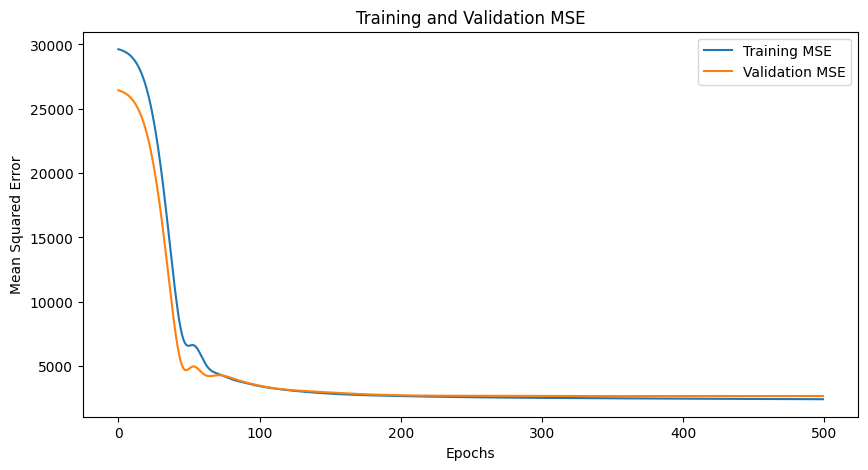

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training MSE')
plt.plot(val_losses, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Validation MSE')
plt.show()
